In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')
df.describe()


,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
count,104409.000000,104409.000000,104409.000000,104409.000000,104409.000000,89839.000000,89839.000000,65615.000000,96571.000000,104409.000000
mean,1992.710715,6.753517,15.781666,0.559597,-53.070046,-3.505847,0.451069,81.245035,26.689702,27.535275
std,2.941256,3.450238,8.796154,4.586084,134.416226,3.222261,2.927329,5.371216,1.905292,2.167564
min,1980.000000,1.000000,1.000000,-8.810000,-180.000000,-12.400000,-10.800000,54.000000,17.050000,17.340000
25%,1991.000000,4.000000,8.000000,-2.010000,-140.200000,-5.900000,-1.500000,77.600000,25.750000,26.450000
50%,1993.000000,7.000000,16.000000,0.010000,-110.200000,-4.200000,0.400000,81.200000,27.160000,28.080000
75%,1995.000000,10.000000,23.000000,4.990000,147.000000,-1.800000,2.400000,84.800000,28.060000,29.190000
max,1996.000000,12.000000,31.000000,9.050000,171.100000,12.500000,11.000000,99.900000,31.480000,31.270000


In [4]:
df.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [5]:
df.sort_values(['year','month','day'],inplace=True)
df.reset_index(inplace=True,drop=True)
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(-3.505847,3.222261),inplace=True)
df['mer.winds'].fillna(np.random.normal(0.451069,2.927329),inplace=True)
df['humidity'].fillna(np.random.normal(81.267260,5.363381),inplace=True)

x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.isnull().sum()

year         0
month        0
day          0
latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
dtype: int64

In [6]:
df.describe()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
count,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000,96571.000000
mean,1992.734413,6.753860,15.783734,0.490296,-56.588021,-3.954577,0.536807,80.860202,26.689702,27.527135
std,2.943185,3.438405,8.793855,4.583724,132.833319,3.262973,2.762327,4.402515,1.905292,2.159472
min,1980.000000,1.000000,1.000000,-8.810000,-180.000000,-12.200000,-10.800000,54.000000,17.050000,17.340000
25%,1991.000000,4.000000,8.000000,-2.020000,-147.000000,-6.600000,-1.200000,79.500000,25.750000,26.450000
50%,1993.000000,7.000000,16.000000,0.010000,-110.250000,-4.700000,1.000000,80.061209,27.160000,28.060000
75%,1995.000000,10.000000,23.000000,4.990000,146.900000,-2.200000,2.100000,82.800000,28.060000,29.170000
max,1996.000000,12.000000,31.000000,9.050000,170.000000,12.500000,11.000000,99.900000,31.480000,31.270000


In [7]:
df.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1980,3,8,-0.02,-109.44,-4.9,1.1,80.061209,25.66,25.97
1,1980,3,9,-0.02,-109.44,-4.5,2.2,80.061209,25.69,25.28
2,1980,3,10,-0.02,-109.44,-3.8,1.9,80.061209,25.56,24.31
3,1980,3,12,-0.02,-109.44,-4.4,0.3,80.061209,24.72,23.64
4,1980,3,13,-0.02,-109.44,-3.2,0.1,80.061209,24.66,24.34


In [16]:
from prophet import Prophet
from sklearn.model_selection import train_test_split 

In [17]:
!pip install prophet


In [18]:
# Combine year, month, and day into a single date column
df['ds'] = pd.to_datetime(df[['year', 'month', 'day']])

In [19]:

# Rename columns to 'ds' and 'y' if they are named differently
df.rename(columns={'s.s.temp.': 'y'}, inplace=True)
df.head()


,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,y,ds
0,1980,3,8,-0.02,-109.44,-4.9,1.1,80.061209,25.66,25.97,1980-03-08
1,1980,3,9,-0.02,-109.44,-4.5,2.2,80.061209,25.69,25.28,1980-03-09
2,1980,3,10,-0.02,-109.44,-3.8,1.9,80.061209,25.56,24.31,1980-03-10
3,1980,3,12,-0.02,-109.44,-4.4,0.3,80.061209,24.72,23.64,1980-03-12
4,1980,3,13,-0.02,-109.44,-3.2,0.1,80.061209,24.66,24.34,1980-03-13


In [30]:
# Splitting data into training and testing sets (example split)
train_size = int(len(df) * 0.8)
df_train = df[:train_size]
df_test = df[train_size:]

In [31]:
# Initialize the model
model = Prophet()

# Fit the model to your data
model.fit(df)


09:11:03 - cmdstanpy - INFO - Chain [1] start processing
09:12:15 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# Create a dataframe for future dates
future = model.make_future_dataframe(periods=365)  # Adjust periods to the number of days you want to predict

# Make predictions
forecast = model.predict(future)


C:\Users\dilee\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\dilee\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


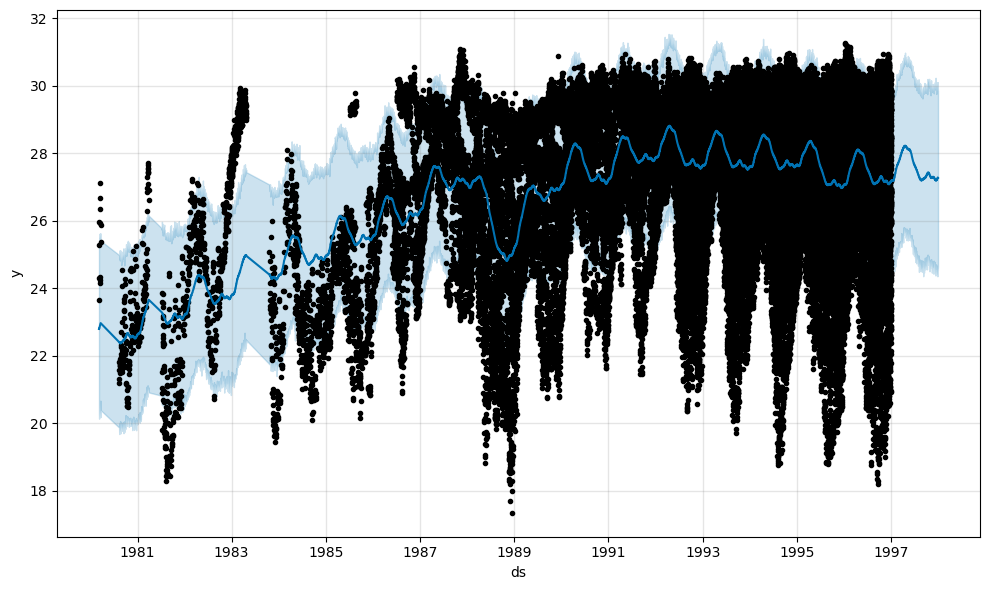

C:\Users\dilee\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\dilee\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\dilee\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

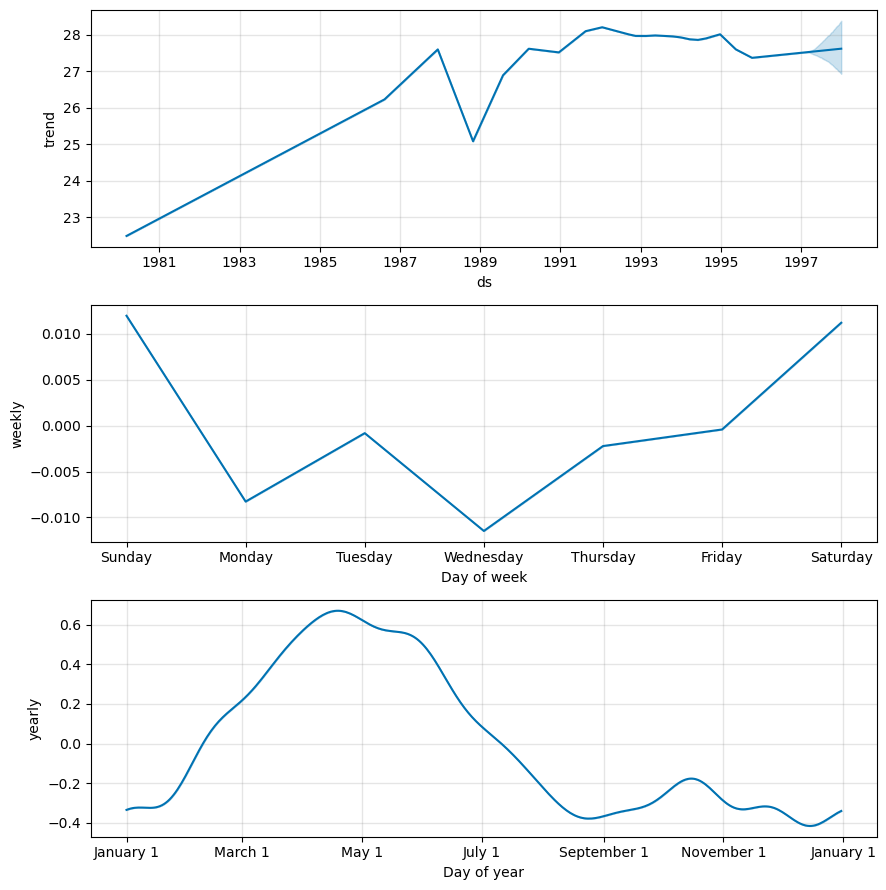

In [33]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


In [34]:
print(df.head())

   year  month  day  latitude  longitude  zon.winds  mer.winds   humidity  \
0  1980      3    8     -0.02    -109.44       -4.9        1.1  80.061209   
1  1980      3    9     -0.02    -109.44       -4.5        2.2  80.061209   
2  1980      3   10     -0.02    -109.44       -3.8        1.9  80.061209   
3  1980      3   12     -0.02    -109.44       -4.4        0.3  80.061209   
4  1980      3   13     -0.02    -109.44       -3.2        0.1  80.061209   

   air temp.      y         ds  
0      25.66  25.97 1980-03-08  
1      25.69  25.28 1980-03-09  
2      25.56  24.31 1980-03-10  
3      24.72  23.64 1980-03-12  
4      24.66  24.34 1980-03-13  


In [41]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your training data is in a dataframe named `df`
# and your testing data is in a dataframe named `test_df`
# Ensure both `df` and `test_df` have the same structure with columns 'ds' and 'y'


# Make predictions for the test set
future_test = model.make_future_dataframe(periods=len(df_test))
forecast_test = model.predict(df_test[['ds']])

# Extract the forecasted values that correspond to the test set
predictions = forecast_test.iloc[-len(df_test):]['yhat']

# Evaluate the model
mae = mean_absolute_error(df_test['y'], predictions)
rmse = np.sqrt(mean_squared_error(df_test['y'], predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(df_test['y'], forecast['yhat'])
print(f'R^2 Score: {r2:.2f}')


Mean Absolute Error: 1.75543504326188
Root Mean Squared Error: 2.2458428567001305


ValueError: Found input variables with inconsistent numbers of samples: [19315, 5891]